<a href="https://colab.research.google.com/github/Ahnaf20/Data-Mining-Kel-8/blob/main/DATA_MINING_CASE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    dataG = pd.read_excel('data/data gabungan.xlxs')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://github.com/Ahnaf20/Data-Mining-Kel-8/blob/fc607887a8662494ad9eeec4ea6e765ea5926ecd/data%20gabungan.xlsx
    dataG = pd.read_excel(data/data gabungan.xlxs)

SyntaxError: ignored

SyntaxError: ignored

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

## Import data gabungan 


In [ ]:
file_lengkap = '/content/data gabungan.xlsx'

In [ ]:
dataG = pd.read_excel(file_lengkap, parse_dates=True, index_col = "created_at")
dataG

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,kota
created_at,,,,,,,,,,,,,,
2021-06-12,202,198,8,3,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
2021-02-12,30,55,2,1,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2021-06-12,19,35,2,1,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
2021-06-12,33,42,2,2,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
2021-06-12,30,55,2,2,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08,60,55,2,2,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters...",Tangerang
2021-12-08,66,70,3,2,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tangerang
2021-12-08,202,85,4,3,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tangerang


In [ ]:
dataG.shape

(363, 14)

In [ ]:
dataG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, 2021-06-12 to 2021-12-08
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          363 non-null    int64  
 1   LB          363 non-null    int64  
 2   KT          363 non-null    int64  
 3   KM          363 non-null    int64  
 4   garasi      107 non-null    float64
 5   carport     276 non-null    float64
 6   lokasi      363 non-null    object 
 7   sertifikat  359 non-null    object 
 8   listrik     334 non-null    float64
 9   hadap       147 non-null    object 
 10  harga       363 non-null    int64  
 11  URL         363 non-null    object 
 12  deskripsi   350 non-null    object 
 13  kota        363 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 42.5+ KB


In [ ]:
dataG['lokasi'] = dataG['lokasi'].astype('category')
dataG['sertifikat'] = dataG['sertifikat'].astype('category')
dataG['hadap'] = dataG['hadap'].astype('category')
dataG['URL'] = dataG['URL'].astype('category')
dataG['deskripsi'] = dataG['deskripsi'].astype('category')
dataG['kota'] = dataG['kota'].astype('category')

dataG.dtypes

LT               int64
LB               int64
KT               int64
KM               int64
garasi         float64
carport        float64
lokasi        category
sertifikat    category
listrik        float64
hadap         category
harga            int64
URL           category
deskripsi     category
kota          category
dtype: object

In [ ]:
dataG.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LT,363.0,NaN,NaN,NaN,190.721763,291.355533,16.0,70.0,100.0,203.5,3422.0
LB,363.0,NaN,NaN,NaN,191.418733,243.406546,15.0,60.0,109.0,242.5,2500.0
KT,363.0,NaN,NaN,NaN,3.4573,1.530616,1.0,2.0,3.0,4.0,10.0
KM,363.0,NaN,NaN,NaN,2.677686,1.48034,1.0,2.0,2.0,4.0,10.0
garasi,107.0,NaN,NaN,NaN,1.962617,1.619022,1.0,1.0,1.0,2.0,10.0
carport,276.0,NaN,NaN,NaN,1.742754,1.265968,1.0,1.0,1.0,2.0,10.0
lokasi,363,57,Sawangan,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,359,10,SHM,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,334.0,NaN,NaN,NaN,3928.143713,6288.522232,900.0,2200.0,2200.0,3500.0,66000.0
hadap,147,12,Utara,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataG.count()

LT            363
LB            363
KT            363
KM            363
garasi        107
carport       276
lokasi        363
sertifikat    359
listrik       334
hadap         147
harga         363
URL           363
deskripsi     350
kota          363
dtype: int64

#Cek Duplikat Data


In [ ]:
#melihat duplikat data
dataG.duplicated().sum()

0

Data yang kita proses tidak memiliki duplikat data.


#Cek Missing Value

In [ ]:
#melihat missing value data
dataG.isna().sum()

LT              0
LB              0
KT              0
KM              0
garasi        256
carport        87
lokasi          0
sertifikat      4
listrik        29
hadap         216
harga           0
URL             0
deskripsi      13
kota            0
dtype: int64

Akan diatasi missing value data

In [ ]:
#Mengatasi missing value
dataG['garasi'].fillna(math.floor(dataG['garasi'].median()),inplace =True)
dataG['carport'].fillna(math.floor(dataG['carport'].median()),inplace =True)
dataG['listrik'].fillna(math.floor(dataG['listrik'].median()),inplace =True)

In [ ]:
dataG.isnull().sum()

LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          0
sertifikat      4
listrik         0
hadap         216
harga           0
URL             0
deskripsi      13
kota            0
dtype: int64

In [ ]:
modus = dataG['hadap'].mode()[0]
dataG['hadap'] = dataG['hadap'].fillna(modus)
dataG['hadap'].isna().sum()

modus = dataG['sertifikat'].mode()[0]
dataG['sertifikat'] = dataG['sertifikat'].fillna(modus)
dataG['sertifikat'].isna().sum()

modus = dataG['deskripsi'].mode()[0]
dataG['deskripsi'] = dataG['deskripsi'].fillna(modus)
dataG['deskripsi'].isna().sum()

0

In [ ]:
dataG.isnull().sum()

LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
kota          0
dtype: int64

In [ ]:
dataG

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,kota
created_at,,,,,,,,,,,,,,
2021-06-12,202,198,8,3,1.0,1.0,Jakarta Pusat,SHM,2200.0,Utara,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
2021-02-12,30,55,2,1,1.0,1.0,Jakarta Pusat,SHM,2200.0,Utara,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2021-06-12,19,35,2,1,1.0,1.0,Jakarta Pusat,SHM,2200.0,Utara,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
2021-06-12,33,42,2,2,1.0,1.0,Jakarta Pusat,SHM,2200.0,Utara,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
2021-06-12,30,55,2,2,1.0,1.0,Jakarta Pusat,SHM,2200.0,Utara,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08,60,55,2,2,1.0,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,Utara,711,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters...",Tangerang
2021-12-08,66,70,3,2,1.0,1.0,"Ciater, Tangerang",SHM,1300.0,Utara,850,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tangerang
2021-12-08,202,85,4,3,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tangerang


Missing Value sudah teratasi.

##Outlier

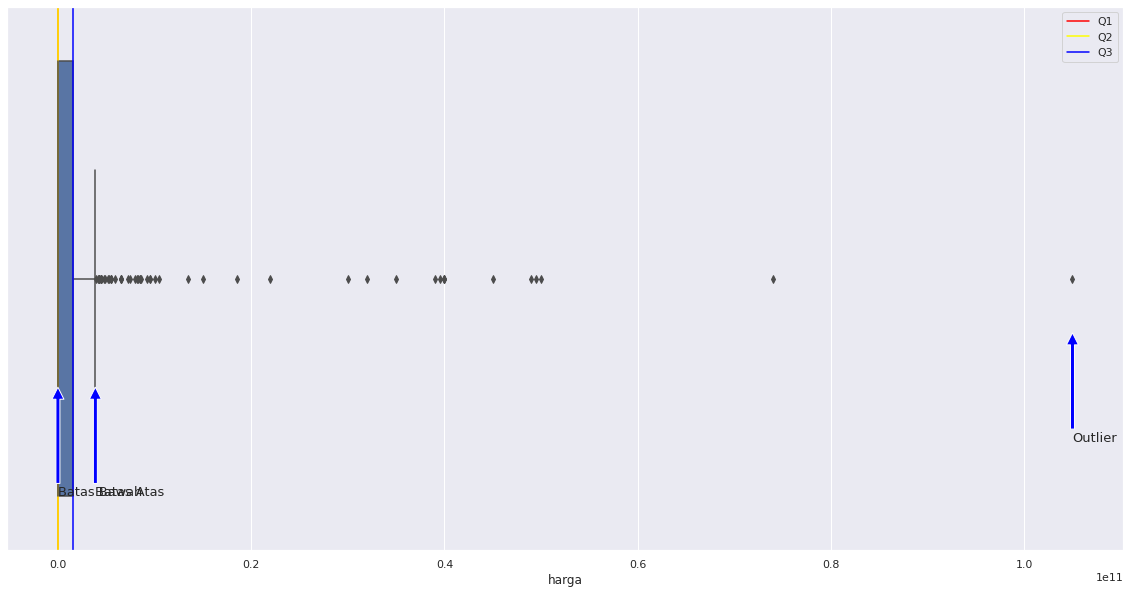

In [ ]:
#Memeriksa outlier pada variabel harga
plt.figure(figsize = (20, 10))
sns.boxplot(dataG['harga'])
plt.axvline(dataG['harga'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(dataG['harga'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(dataG['harga'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (dataG['harga'].describe()['max'],0.1), xytext = (dataG['harga'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = dataG['harga'].describe()['75%'] - dataG['harga'].describe()['25%']
plt.annotate('Batas Atas', (dataG['harga'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (dataG['harga'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (dataG['harga'].describe()['min'], 0.2), 
             xytext = (dataG['harga'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

Dapat dilihat berdasarkan plot yang dihasilkan terdapat oulier

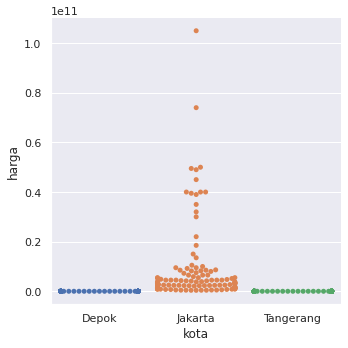

In [ ]:
p= sns.catplot(x="kota",y="harga" ,kind="swarm", data=dataG)

Berdasarkan plot atau output yang dihasilkan dapat dilihat bahwa rerata harga rumah dengan harga tinggi berada di Kota Jakarta, sedangkan rerata harga rumah di kota Tangerang dan Depok cenderung sama.

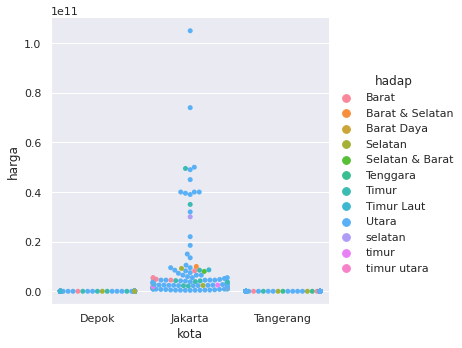

In [ ]:
p= sns.catplot(x="kota",y="harga",hue="hadap" ,kind="swarm", data=dataG)

Berdasarkan plot atau output diatas dapat dilihat bahwa rumah di kota Jakarta, Depok dan Tangerang cenderung menghadap ke arah Utara.

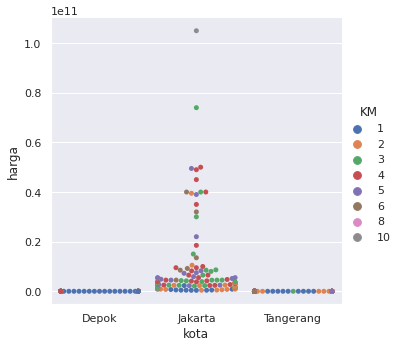

In [ ]:
p= sns.catplot(x="kota",y="harga",hue="KM" ,kind="swarm", data=dataG)

Berdasarkan output diatas dapat dilihat bahwa rumah di kota Jakarta yang memiliki 4 kamar mandi harganya cenderung sama dengan harga rumah yang hanya memiliki 2 atau 3 kamar mandi, hal ini dapat dipertimbangkan jika akan membeli